In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn.metrics as metrics

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Battery_Data.csv")

In [ ]:
data.head()

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922


(array([8117., 5538., 5346., 3538., 4913., 3680., 3065., 3474., 5147.,
        7467.]),
 array([1.28745252, 1.34435601, 1.4012595 , 1.45816299, 1.51506648,
        1.57196997, 1.62887346, 1.68577695, 1.74268044, 1.79958393,
        1.85648742]),
 <a list of 10 Patch objects>)

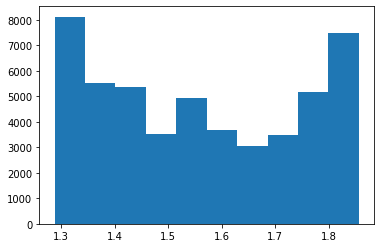

In [ ]:
plt.hist(data['capacity'])

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time


In [ ]:

scaler = preprocessing.MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time,datetime_NA
0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.061157,0.49985,0.000000,0.000000,0.0
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.060936,0.49985,0.992449,0.004547,0.0
2,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.064396,0.00005,0.722511,0.009675,0.0
3,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.072932,0.00005,0.714960,0.014574,0.0
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.083167,0.00005,0.710477,0.019490,0.0


In [ ]:

target_col = ["capacity"]
cat_cols = ['voltage_measured	','current_measured	','temperature_measured','current_load','voltage_load','time']
num_cols= list(set(list(data.columns))-set(cat_cols)-set(target_col))


In [ ]:
data.isnull().any()

Unnamed: 0               True
cycle                    True
ambient_temperature      True
datetime                 True
capacity                False
voltage_measured         True
current_measured         True
temperature_measured    False
current_load            False
voltage_load            False
time                    False
datetime_NA             False
dtype: bool

In [ ]:
num_cat_cols = num_cols+cat_cols

In [ ]:
data[num_cols] = data[num_cols].fillna(data[num_cols].mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
features=list(set(list(data.columns))-set(target_col))

In [ ]:
train=data[data['capacity']=='Train']
train['is_train'] = np.random.uniform(0, 1, len(train)) <= .75
Train= train[train['is_train']==True], train[train['is_train']==False]

In [ ]:
x_train = Train[list(features)].values
y_train = Train["capacity"].values

In [ ]:
random.seed(100)
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(x_train, y_train)status = rf.predict_proba(x_validate)



In [ ]:
mae = metrics.mean_absolute_error(x_train,y_train)

rmse = np.sqrt(mse) # or mse**(0.5)  

print("Results of sklearn.metrics:")
print("MAE:",mae)

print("RMSE:", rmse)